
**Name : Satwik Jena**<br>
**Student Number: 13909871**

**Academic Declaration**:
“I have read and understood the sections of plagiarism 
in the College Policy on assessment offences and confirm that the work is my own, with the work of others 
clearly acknowledged. I give my permission to submit my report to the plagiarism testing database that the 
College is using and test it using plagiarism detection software, search engines or meta-searching software.

<div class="warning" style='padding:0.1em; background-color:#F4F0E5; color:#000000'>
<span>
<p style='text-align:center'>
<b>Contents</b></p>
<a id='contents'></a>
    
1. [Executive Summary](#Executive_Summary)<br><br>
2. [Essay](#Essay)<br><br>
3. [Packages Used](#packages)<br><br>
4. [Section 1:Data Source](#Phase1)<br><br>
5. [Section 2: Dimensional analysis](#Dimalnalysis)<br><br>
    (a) [Columns and their data types](#datatypes)<br><br>
    (b) [Data Duplicates](#duplicates)<br><br>
    (c) [Check for Null data points](#Null)<br><br>
    (d) [Boxplots](#Boxplots)<br><br>
    (e) [Summary of descriptive statistics](#Summarydec)<br><br>
    (f) [Section Summary](#Summary1)<br><br>
6. [Section 3a. Select three dimensions that could be used as predictors and a  fourth dimension as predicted](#selectdim)<br><br>
    (a) [Visualise all the dimensions with respect to the predicted dimension](#Visualise1)<br><br>
    (b) [Exclusion of outliers](#outliers)<br><br>
    (c) [Mutual information gain for each dimension](#MI)<br><br>
    (d) [Variance Threshold for feature selection](#VT)<br><br>
    (e) [Correlation between different dimensions](#corr)<br><br>
    (f) [Section Summary](#Summary2)<br><br>
7. [Section 3b. Visualize the values of the predictor dimensions and the predicted dimension.](#visualisedim)<br><br>
8. [Section 3c. Predict the class of the car using the selected features.](#predict1)<br><br>
    (a) [Reduction of the dimensions  using PCA](#ReducedimPCA)<br><br>
    (b) [Run regression/classification algorithms to check and check quality of the prediction](#regressPCA)<br><br>
    (c) [Visualisation of the PCA loadings](#visualisePCA)<br><br>
    (d) [Section Summary](#Summary3)<br><br>
9. [Section 5: Compare the quality of prediction between the results of phase 3 and phase 4](#Sec5)
    
</p>
</div>



    
---
    

### 1. Executive Summary<a id='Executive_Summary'></a>  

 [back to contents](#contents)<br><br>

### 2. Essay <a id='Essay'></a>

Electric Cars are a fast growing segment of the automobile industry. They are pushing their limits in terms of battery, motor quality and modern features. <br>
The below analysis aims to classify electric cars into popular segments using typical features. The One Electric Vehicle dataset,sourced from Kaggle, is used to develop the models in the analysis. In this exercise we have taken two approaches to select the dimensions which are fed into the prediction algorithm:<br>
- Mutual information gain for each dimension, Variance threshold method and subject knowledge<br>
- Principal Component Analysis(PCA)<br>

We have used K-nearest neighbour approach to predict the class of a car using the reduced set of fetaures obtained in previous steps.<br>

List of dimensions in the data : 

| Dimension         | Meaning of the Dimension |
| :---------------- | :-------------------------- | 
| AccelSec          |   Time taken to accelerate  |
| TopSpeed_KmH      |   Top Speed of the car   |
| Range_Km          |   Range (in km) in single charge    |
| Efficiency_WhKm   |   Power consumed per kilometre   |
| FastCharge_KmH    |   Kilometers for which the battery is charges in 1 hour   |
| Seats	            |   No of seats   |
| PriceEuro	        |   Price of the car in EURO   |
| Segment	        |   Segment of the car (A,B,C,D, etc.)   |


 [back to contents](#contents)<br><br>

### 3. Packages used<a id='packages'></a>

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale, normalize
from sklearn import decomposition
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.inspection import DecisionBoundaryDisplay

 [back to contents](#contents)<br><br>

***

### 4. Phase 1: Data Source<a id='Phase_1'></a>

The datset analysed here contains details on various core features of a electric car such as Acceleration rate, Top Speed, Range on single charge, Fast Charge capability and no of seats. 
The data can be sourced from https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset?select=ElectricCarData_Clean.csv

In [3]:
file="ElectricCarData_Clean.csv"
df=pd.read_csv(file)
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Segment
0,Tesla,Roadster,2.1,410,970,206,920,4,215000,S
1,Tesla,Model S Performance,2.5,261,505,188,550,5,96990,F
2,Tesla,Model 3 Long Range Performance,3.4,261,435,167,910,5,61480,D
3,Porsche,Taycan Turbo S,2.8,260,375,223,780,4,180781,F
4,Porsche,Taycan Turbo,3.2,260,390,215,810,4,148301,F


 [back to contents](#contents)<br><br>

***

### 5. Phase 2: Dimensional analysis <a id='Dimanalysis'></a>

#### (a) Columns and their data types <a id='datatypes'></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            98 non-null     object 
 1   Model            98 non-null     object 
 2   AccelSec         98 non-null     float64
 3   TopSpeed_KmH     98 non-null     int64  
 4   Range_Km         98 non-null     int64  
 5   Efficiency_WhKm  98 non-null     int64  
 6   FastCharge_KmH   98 non-null     int64  
 7   Seats            98 non-null     int64  
 8   PriceEuro        98 non-null     int64  
 9   Segment          98 non-null     object 
dtypes: float64(1), int64(6), object(3)
memory usage: 7.8+ KB


 [back to contents](#contents)<br><br>

#### (b) Data Duplicates<a id='duplicates'></a>

In [5]:
df.duplicated().count

<bound method Series.count of 0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Length: 98, dtype: bool>

 [back to contents](#contents)<br><br>

#### (c) Check for Null data points<a id='Null'></a>

In [6]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
Seats              0
PriceEuro          0
Segment            0
dtype: int64

 [back to contents](#contents)<br><br>

#### (d) Boxplots <a id='Boxplots'></a>

AccelSec


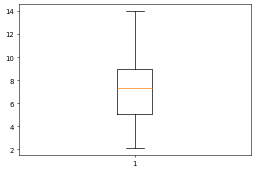

TopSpeed_KmH


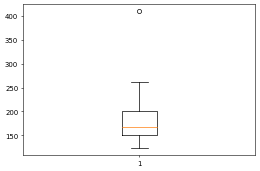

Range_Km


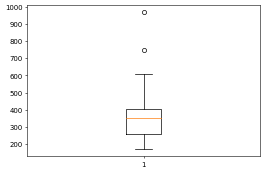

Efficiency_WhKm


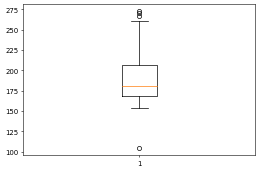

FastCharge_KmH


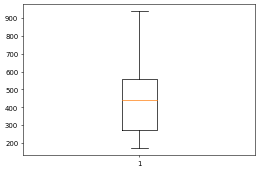

Seats


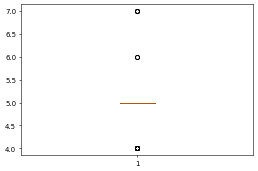

PriceEuro


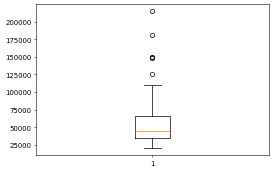

In [7]:
x=df.select_dtypes(exclude=["object"]).columns
for i in x:
    plt.figure(i)
    print(i)
    plt.boxplot(df[i])
    plt.show()

 [back to contents](#contents)<br><br>

#### (e) Summary of descriptive statistics <a id='Summarydec'></a>

In [8]:
dimension_char=df.describe().T
dimension_char["mean_2sigma"]=dimension_char["mean"]+dimension_char["std"]*2
dimension_char["mean_>_2sigma_count"]=df[df>dimension_char["mean_2sigma"]].count()
dimension_char["range"]=dimension_char["max"]-dimension_char["min"]
dimension_char

C:\Users\DELL\AppData\Local\Temp\ipykernel_16920\1849886793.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dimension_char["mean_>_2sigma_count"]=df[df>dimension_char["mean_2sigma"]].count()


,count,mean,std,min,25%,50%,75%,max,mean_2sigma,mean_>_2sigma_count,range
AccelSec,98.0,7.046939,2.483895,2.1,5.10,7.3,8.95,14.0,12.014728,3,11.9
TopSpeed_KmH,98.0,181.653061,43.248527,123.0,150.00,167.0,200.00,410.0,268.150115,1,287.0
Range_Km,98.0,350.153061,118.217984,170.0,258.75,350.0,407.50,970.0,586.589030,3,800.0
Efficiency_WhKm,98.0,189.867347,30.055837,104.0,168.00,181.0,206.00,273.0,249.979022,6,169.0
FastCharge_KmH,98.0,456.734694,201.262897,170.0,275.00,440.0,560.00,940.0,859.260487,6,770.0
Seats,98.0,4.959184,0.687418,4.0,5.00,5.0,5.00,7.0,6.334020,6,3.0
PriceEuro,98.0,57324.683673,34288.246370,20129.0,35000.00,45000.0,65465.00,215000.0,125901.176413,5,194871.0


In [9]:
dimension_char.iloc[:,9:11]

,mean_>_2sigma_count,range
AccelSec,3,11.9
TopSpeed_KmH,1,287.0
Range_Km,3,800.0
Efficiency_WhKm,6,169.0
FastCharge_KmH,6,770.0
Seats,6,3.0
PriceEuro,5,194871.0


 [back to contents](#contents)<br><br>

array([[<AxesSubplot:title={'center':'AccelSec'}>,
        <AxesSubplot:title={'center':'TopSpeed_KmH'}>,
        <AxesSubplot:title={'center':'Range_Km'}>],
       [<AxesSubplot:title={'center':'Efficiency_WhKm'}>,
        <AxesSubplot:title={'center':'FastCharge_KmH'}>,
        <AxesSubplot:title={'center':'Seats'}>],
       [<AxesSubplot:title={'center':'PriceEuro'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

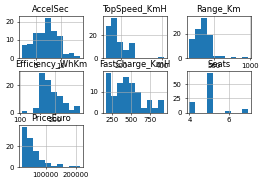

In [10]:
df.hist(bins=10)

 [back to contents](#contents)<br><br>


#### (f) Section Summary :<a id='Summary1'></a>
- There are 10 dimensions of the data. Out of which, 7 values are numeric. 
- There are no nulls in the data. The below box plots shows the spread of the data and the outliers.
- There are no duplicates in the data
- There are 98 data points.
- Range of dimensions:
| Item              | No of observation beyond 95% | Range |
| :---------------- | :------: | ----: |
| AccelSec          |   3   | 11.9 |
| TopSpeed_KmH      |   1   | 287.0 |
| Range_Km          |   3   | 800.0 |
| Efficiency_WhKm   |   6   | 169.0 |
| FastCharge_KmH    |   6   | 770.0 |
| Seats	            |   6   |  3.0  |
| PriceEuro	        |   5 |	 194871.0|


In [87]:
broader_class=dict(zip(["A","B","C","D","E","F","N","S"],["small","small","small","Lower Medium D","Luxury E","Luxury F","Truck","Sports"]))
broad_class=pd.DataFrame(broader_class.items(),columns=["Segment","class"])
data=df.join(broad_class.set_index('Segment'), on='Segment')

 [back to contents](#contents)<br><br>

### 6. Section 3a. Select three dimensions that could be used as predictors and a  fourth dimension as predicted <a id='selectdim'></a>

#### (a) Visualise all the features with respect to the predicted dimension "class"<a id='Visualise1'></a>

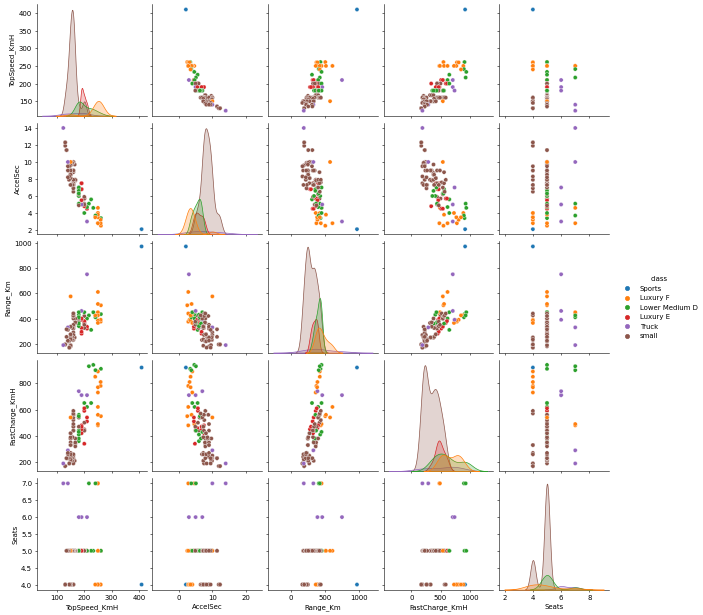

In [12]:
columns=["TopSpeed_KmH","AccelSec","Range_Km","FastCharge_KmH","Seats","class"]
data_selected=data[columns]
sns.pairplot(data_selected,hue="class")

 [back to contents](#contents)<br><br>

#### (b) Exclusion of outliers <a id='outliers'></a>

We have excluded all such data points which are beyond the 95 percentile of the distribution for each major feature. This will help us understand the general basis for classification of the cars into the various segmnets. The extreme variations in each functionality is excluded.

In [13]:
columns=["TopSpeed_KmH","AccelSec","Range_Km","FastCharge_KmH","Seats","class"]
X=["TopSpeed_KmH","AccelSec","Range_Km","FastCharge_KmH"]

data_selected=data[columns]
for i in X:

    p95, p5 = np.percentile(data_selected[i], [95, 0])
    data_selected = data_selected[data_selected[i]< p95]
    data_selected = data_selected[data_selected[i]> p5]

 [back to contents](#contents)<br><br>

#### (c) Mutual information gain for each feature <a id='MI'></a>

<AxesSubplot:>

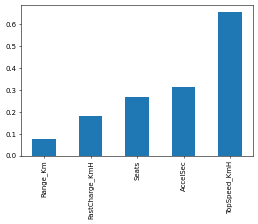

In [14]:
from sklearn.feature_selection import mutual_info_classif
le = preprocessing.LabelEncoder()
mutual_info = mutual_info_classif(data_selected.iloc[:,:5], le.fit_transform(data_selected.iloc[:,5]))
mutual_info = pd.Series(mutual_info)
mutual_info.index = data_selected.iloc[:,:5].columns
mutual_info.sort_values(ascending=True,inplace=True)
mutual_info.plot(kind="bar")

#### (d) Variance Threshold for feature selection <a id='VT'></a>

In [15]:
Varthreshold = VarianceThreshold()
Varthreshold.fit_transform(data_selected.iloc[:,:5])
Variances=pd.Series(Varthreshold.variances_)
Variances.index = data_selected.iloc[:,:5].columns
pd.DataFrame(Variances)

,0
TopSpeed_KmH,110.000000
AccelSec,2.774182
Range_Km,260.000000
FastCharge_KmH,560.000000
Seats,0.192653


 [back to contents](#contents)<br><br>

#### Analysis of intra-group and within-group variance 

In [16]:
result=data_selected.iloc[:,:6]
result=result.groupby('class').mean()
result=result.div(result.sum(axis=0), axis=1)

Within group variance<a id='withinvar'></a>

In [17]:
data_selected.groupby('class').var().sort_values("TopSpeed_KmH")

,TopSpeed_KmH,AccelSec,Range_Km,FastCharge_KmH,Seats
class,,,,,
Luxury F,0.000000,0.125000,200.000000,800.000000,0.00000
Luxury E,67.777778,1.344556,1658.055556,6401.111111,0.00000
small,224.890842,1.865930,5639.384829,13685.291397,0.12951
Lower Medium D,287.500000,0.475000,1427.777778,11286.111111,0.00000
Truck,800.000000,4.500000,1800.000000,101250.000000,0.50000


<AxesSubplot:xlabel='class'>

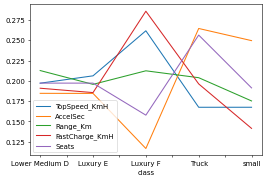

In [18]:
# plt.rcParams['figure.dpi'] = 50
result.plot()

We can observe that the means of different groups with respect to various features. The mean values of _seat_ and _Range_ are varying the least. The intragroup variance for the seats is also very less. 

 [back to contents](#contents)<br><br>

#### (e) Correlation between different variables<a id='corr'></a>

In [19]:
data_selected.iloc[:,:5].corr()

,TopSpeed_KmH,AccelSec,Range_Km,FastCharge_KmH,Seats
TopSpeed_KmH,1.000000,-0.829203,0.466640,0.685917,-0.120960
AccelSec,-0.829203,1.000000,-0.530501,-0.662145,0.188878
Range_Km,0.466640,-0.530501,1.000000,0.694090,0.114834
FastCharge_KmH,0.685917,-0.662145,0.694090,1.000000,-0.064539
Seats,-0.120960,0.188878,0.114834,-0.064539,1.000000


 [back to contents](#contents)<br><br>


#### (f) Section Summary :<a id='Summary2'></a>

We can observe from the above analysis that:
1. Mutual Information gain is maximum for TopSpeed_KmH, AccelSec, Seats and FastCharge_KmH.
2. Variances of _seats_ dimension is very less. It is very low.

So, we choose TopSpeed_KmH, AccelSec, and FastCharge_KmH for our further analysis.

### Section 3b. Visualize the values of the predictor dimensions and the predicted dimension.<a id='Visualisedim'></a>

$\mathdefault{0}$ $\mathdefault{1}$ $\mathdefault{2}$ $\mathdefault{3}$ $\mathdefault{4}$ $\mathdefault{5}$


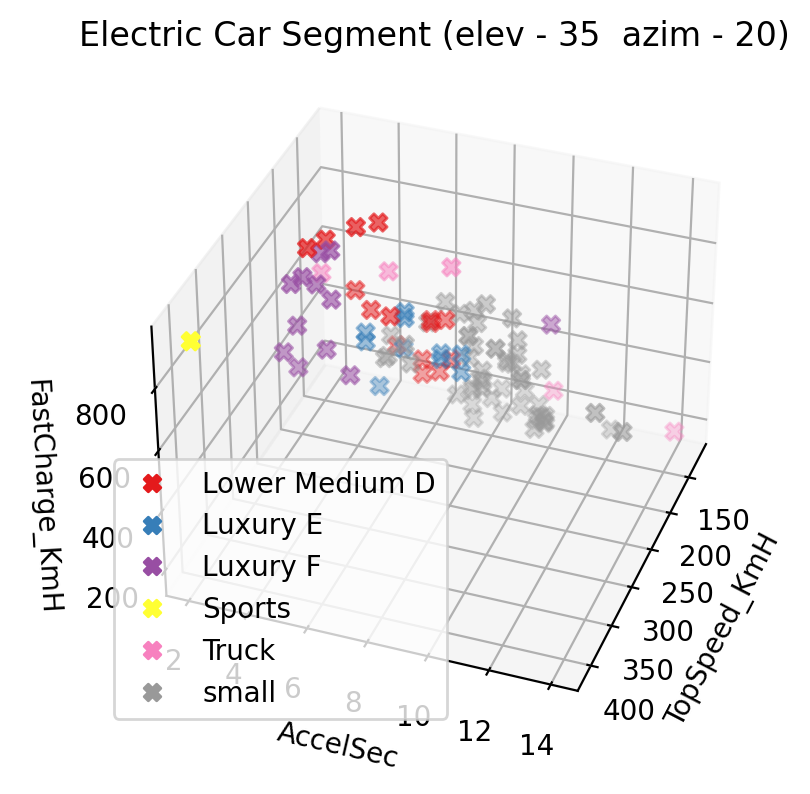

In [32]:
%matplotlib inline
columns=["TopSpeed_KmH","AccelSec","FastCharge_KmH","class"]
data_selected=data[columns]
le = preprocessing.LabelEncoder()

plt.rcParams['figure.dpi'] = 200
fig = plt.figure(1, figsize=(12, 9))
fig.tight_layout(pad=5.0)

for i in range (1,2):
    
    state=220+i
    matplotlib.rcParams['figure.figsize'] = [600, 600]
    ax = fig.add_subplot(state, projection="3d")
    elev=-10+i*45
    azim=-25+i*45
    
    ax.view_init(elev=elev, azim=azim)
    sc=ax.scatter(
        data_selected.iloc[:, 0],
        data_selected.iloc[:, 1],
        data_selected.iloc[:, 2],
        c=le.fit_transform(data_selected.iloc[:, 3]),
        cmap=plt.cm.Set1,
        marker="X",
        s=40,)
    
    ax.set_title("Electric Car Segment (elev - "+str(elev)+"  azim - "+str(azim)+")")
    ax.set_xlabel(columns[0])
    #ax.xaxis.set_ticklabels([])
    ax.set_ylabel(columns[1])
    #ax.yaxis.set_ticklabels([])
    ax.set_zlabel(columns[2])
    #ax.zaxis.set_ticklabels([])
    plt.rcParams['figure.dpi'] = 200
    
handles = sc.legend_elements(num=[0,1,2,3,4,5])[0]  # extract the handles from the existing scatter plot
{0: 'Lower Medium D', 2: 'Luxury F', 1: 'Luxury E', 4: 'small', 3: 'Truck'}

A=le.fit_transform(data_selected.iloc[:, 3])
C=dict(zip(A,le.inverse_transform(A)))
D=list(dict(sorted(C.items())).values())

ax.legend(handles=handles, labels=D)
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
print(*sc.legend_elements()[1])
fig.tight_layout(pad=5.0)
plt.show()

 [back to contents](#contents)<br><br>

### Section 3c. Predict the class of the car using the selected features.<a id='predict1'></a>


####  (a). Predict the calculate and calculate accuracy.<a id='predict2'></a>

In [147]:
X = data_selected.drop('class', axis=1)
y = data_selected['class'].copy()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1)

# Scale the features using StandardScaler
best_accuracy_pca=0
for i in range(1,20):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy>best_accuracy_pca:
        best_accuracy_pca=accuracy 
print("best_accuracy_pca:", best_accuracy_pca*1000/1000.0)

best_accuracy_pca: 0.7142857142857143



#### (b) Section Summary :<a id='Summary2'></a>


1. K-nearest neighbour(KNN) alogorithm was used to solve the classification problem.
2. Data was first standardised and the the KNN algorithm from sklearn was used.
3. The accuracy of the prediction is 63%.

 [back to contents](#contents)<br><br>

### Section 4. Reduction of the dimensions  using PCA and prediction of class of the car.<a id='PredPCA'></a>

#### a. Reduction of the dimensions  using PCA <a id='ReducedimPCA'></a>

In [25]:
columns=["TopSpeed_KmH","AccelSec","Range_Km","FastCharge_KmH","Seats","class"]
data_selected_pca=data[columns]
X=["TopSpeed_KmH","AccelSec","Range_Km","FastCharge_KmH"]

for i in X:
    p95, p5 = np.percentile(data_selected_pca[i], [95, 0])
    data_selected = data_selected_pca[data_selected_pca[i]< p95]
    data_selected = data_selected_pca[data_selected_pca[i]> p5]
scaler1 = StandardScaler()    
data_selected_scaled = scaler1.fit_transform(data_selected_pca.iloc[:,:5])
pca1=decomposition.PCA(n_components=3)
data_reduced_pca = pca1.fit_transform(data_selected_scaled)
data_reduced_pca_orig = np.dot(data_reduced_pca, pca1.components_)
data_reduced = scaler1.inverse_transform(data_reduced_pca_orig)

In [60]:
data_selected_pca.values[0]

array([410, 2.1, 970, 920, 4, 'Sports'], dtype=object)

In [48]:
data_reduced_pca[0]

array([ 7.30469625, -1.72425952,  2.55709983])

In [45]:
pca1.components_

array([[ 0.51545489, -0.50462309,  0.47464773,  0.49947755,  0.06995363],
       [-0.11150945,  0.09263594,  0.0883945 , -0.01334094,  0.9853896 ],
       [-0.14846612,  0.47310651,  0.84377299, -0.15116254, -0.13901464]])

In [49]:
data_reduced_pca_orig[0]

array([ 3.57786991, -2.63606621,  5.47235419,  3.2849973 , -1.54355171])

In [26]:
print("pca1.components_ \n",pca1.components_)
print("pca1.explained_variance_ratio_ \n",pca1.explained_variance_ratio_)

pca1.components_ 
 [[ 0.51545489 -0.50462309  0.47464773  0.49947755  0.06995363]
 [-0.11150945  0.09263594  0.0883945  -0.01334094  0.9853896 ]
 [-0.14846612  0.47310651  0.84377299 -0.15116254 -0.13901464]]
pca1.explained_variance_ratio_ 
 [0.6495209  0.20109106 0.07059028]


 [back to contents](#contents)<br><br>

#### b. Run regression/classification algorithms to check and check quality of the prediction.  <a id='regressPCA'></a>

In [148]:
X = data_reduced_pca.copy()
y = data_selected_pca['class'].copy()

# Split the data into training and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.5,random_state=1)

# Scale the features using StandardScaler
best_accuracy_pca=0

for i in range(1,20):
    scaler = StandardScaler()
    X_train_pca = scaler.fit_transform(X_train_pca)
    X_test_pca = scaler.transform(X_test_pca)
    knn_pca = KNeighborsClassifier(n_neighbors=i)
    knn_pca.fit(X_train_pca, y_train_pca)
    y_pred_pca = knn_pca.predict(X_test_pca) 
    accuracy = accuracy_score(y_test_pca, y_pred_pca)
    if accuracy>best_accuracy_pca:
        best_accuracy_pca=accuracy
        n_neighbors_best=i
print("best_accuracy_pca:", best_accuracy_pca*1000/1000.0)
print("n_neighbors:", n_neighbors_best)

best_accuracy_pca: 0.7346938775510204
n_neighbors: 3


 [back to contents](#contents)<br><br>

#### c. Visualisation of the PCA loadings  <a id='visualisePCA'></a>

In [62]:
import plotly.express as px
features = columns[:5] #,'CaseNum','lat','lon','pop','statenum'
loadings = pca1.components_.T * np.sqrt(pca1.explained_variance_)
fig = px.scatter(data_reduced_pca[:,:2], x=0, y=1)
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*2.5,
        y1=loadings[i, 1]*4.5
    )
    fig.add_annotation(
        x=loadings[i, 0]*1.5,
        y=loadings[i, 1]*1.5,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()


#### (d) Section Summary :<a id='Summary3'></a>


1. Data was first standardised and the PCA was used to reduce the dimensions into 3 dimensions.
2. The accuracy of the prediction is 63%.
3. PCA feature components

| Feature                  | TopSpeed_KmH      | AccelSec    | Range_Km      |FastCharge_KmH |Seats      |
| :----------------------- | :--------------:  | :----:      | :----:        |:----:         |----:      |
| PCA Component 1          |      0.51545489   | -0.50462309 | 0.47464773    | 0.49947755    | 0.06995363|
| PCA Component 2          |     -0.11150945   |  0.09263594 | 0.08839450    |-0.01334094    | 0.98538960|
| PCA Component 3          |     -0.14846612   | 0.47310651  | 0.84377299    |-0.15116254    |-0.13901464| 

4. K-nearest neighbour(KNN) alogorithm was usedto solve the classification problem.
5. Accuracy of 80% was achieved


### Section 5: Compare the quality of prediction between the results of phase 3 and phase 4. <a id='Sec5'></a>

| Method              | Accuracy |
| :---------------- | ------: | 
| Section 3: Using Mutual information gain and Variance Threshold       |   63%  | 
| Section 4: PCA       |   70%   |


The accuarcy of the classification is more using PCA than selecting using other principles as described in section 3.

<Figure size 250x250 with 0 Axes>

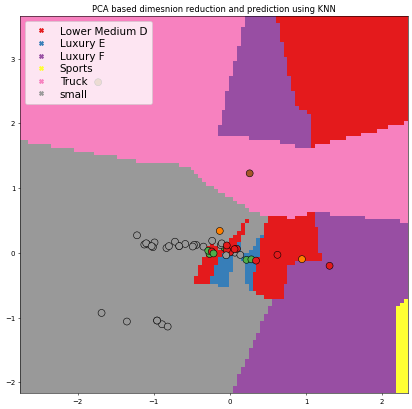

In [203]:
X = data_reduced_pca.copy()
y = data_selected_pca['class'].copy()

# Split the data into training and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.5,random_state=1)

# Scale the features using StandardScaler
plt.rcParams['figure.dpi'] = 50
fig = plt.figure(1, figsize=(5, 5))


scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
knn_pca_2 = KNeighborsClassifier(n_neighbors=1)
knn_pca_2.fit(X_train_pca[:, :2], y_train_pca)
y_pred_pca = knn_pca_2.predict(X_test_pca[:, :2]) 


matplotlib.rcParams['figure.figsize'] = [10, 10]

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    knn_pca_2,
    X_test_pca[:, :2],
    cmap=plt.cm.Set1,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
scp=sns.scatterplot(
    x=X_test_pca[:, 0],
    y=X_test_pca[:, 1],
    hue=le.fit_transform(y_test_pca),
    palette=plt.cm.Set1,
    edgecolor="black",
    s=100,
)
plt.title(
    "PCA based dimesnion reduction and prediction using KNN"
)
A=le.fit_transform(data_selected.iloc[:, 3])
C=dict(zip(A,le.inverse_transform(A)))
D=list(dict(sorted(C.items())).values())

lgnd=scp.legend(handles=handles, labels=D,loc='upper left', handlelength=2, borderpad=.5, labelspacing=0.25,fontsize=15)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([6.0])
plt.show()